# Week2授業課題1 二次元配列と勾配問題

## 1.このテキストについて

テキストの目的
数式演算ライブラリのNumPyに慣れる
勾配を求めてみる

どのように学ぶか
NumPyについていろいろな機能に触れつつ、勾配について学んでいきます。

## 2.二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。


この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。


y
=
1
2
x
+
1

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。



In [51]:
# 1次関数
def primary_func(x):
    y = (x / 2) + 1
    return y


x_min = -50
x_max = 50

x = np.arange(x_min, x_max + 0.1, 0.1).reshape(1001,1)

#print(x)
#print(x.shape)
y = primary_func(x)
print(y)
print(y.shape)

[[-24.  ]
 [-23.95]
 [-23.9 ]
 ...
 [ 25.9 ]
 [ 25.95]
 [ 26.  ]]
(1001, 1)


## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [52]:
concat_xy = np.concatenate([x, y], axis=1)
print(concat_xy)
concat_xy.shape

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


(1001, 2)

## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [53]:
# 変化量
diff = concat_xy[1:] - concat_xy[:-1]
print(diff[0:5])

# 勾配_yの変化量/xの変化量
slope = diff[:,1] / diff[:, 0]
print(slope[0:5])

[[0.1  0.05]
 [0.1  0.05]
 [0.1  0.05]
 [0.1  0.05]
 [0.1  0.05]]
[0.5 0.5 0.5 0.5 0.5]


## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。



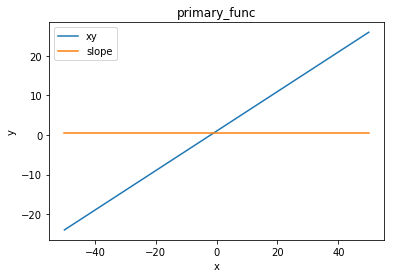

In [54]:
# グラフ描画
# 一次関数　xとyの変化図
# xと勾配の変化図

slope = np.insert(slope, 0, slope[0])  #slope変数をグラフ用に(1000,1)から(1001,1)に整形

plt.title("primary_func")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(concat_xy[:, 0], concat_xy[:,1], label="xy")
plt.plot(x, slope, label="slope")
plt.legend()
plt.show()

##【問題5】Pythonの関数化

問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。


y
=
x
2
(
−
50
≤
x
≤
50
)
y
=
2
x
2
+
2
x
(
−
50
≤
x
≤
50
)
y
=
s
i
n
(
x
1
2
)
(
0
≤
x
≤
50
)

また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。



In [61]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):

    """
  変化量を使い勾配を計算する。

  Parameters
  ----------------
  function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
  x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

  Returns
  ----------------
  array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
  gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    
    x = np.arange(x_range[0], x_range[1], x_range[2])
    y = function
    reshape_x = x.reshape(len(x), 1)
    reshape_y = y.reshape(len(y), 1)
    array_xy = np.concatenate((reshape_x, reshape_y), axis=1)
    # print(array_xy)
    delta = array_xy[1:] - array_xy[:-1]
    gradient = delta[:,1] / delta[:, 0]
    
    return array_xy, gradient

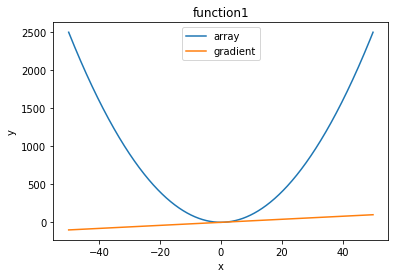

In [62]:
# 関数1

def function1(array_x):
    array_y1 = array_x**2
    return array_y1


function1 = function1(np.arange(-50, 50.1, 0.1))
array_xy_1, gradient_1 = compute_gradient(function1)

#print(array_xy)
#print(array_xy.shape)
#print(gradient)
#print(gradient.shape)

#gradient変数(1000,1)を(1001,1)に変形
reshape_gradient_1 = np.insert(gradient_1, 0, gradient_1[0])

# グラフ描画
# 関数1
plt.title("function1")

plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy_1[:, 0], array_xy_1[:, 1], label="array")
plt.plot(array_xy_1[:, 0], reshape_gradient_1, label="gradient")
plt.legend()
plt.show()

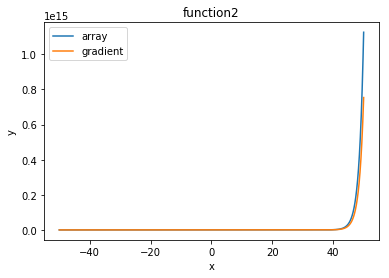

In [63]:
# 関数2

def function2(array_x):
    array_y2 = (array_x**2)*2 + 2**array_x
    return array_y2


function2 = function2(np.arange(-50, 50.1, 0.1))
array_xy_2, gradient_2 = compute_gradient(function2)

#print(array_xy)
#print(array_xy.shape)
#print(gradient)
#print(gradient.shape)

#gradient変数(1000,1)を(1001,1)に変形
reshape_gradient_2 = np.insert(gradient_2, 0, gradient_2[0])

# グラフ描画
plt.title("function2")

plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy_2[:, 0], array_xy_2[:, 1], label="array")
plt.plot(array_xy_2[:, 0], reshape_gradient_2, label="gradient")
plt.legend()
plt.show()

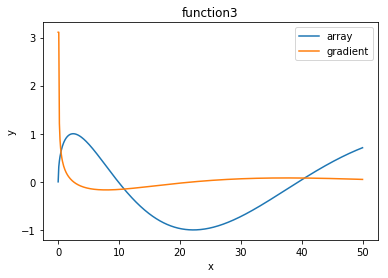

In [64]:
# 関数3
def function3(array_x):
    array_y3 = np.sin(array_x**(2**(-1)))
    return array_y3

function3 = function3(np.arange(0, 50.1, 0.1))
array_xy_3, gradient_3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))

#print(array_xy)
#print(array_xy.shape)
#print(gradient)
#print(gradient.shape)

#gradient変数(500,1)を(501,1)に変形
reshape_gradient_3 = np.insert(gradient_3, 0, gradient_3[0])

# グラフ描画
plt.title("function3")

plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy_3[:, 0], array_xy_3[:, 1], label="array")
plt.plot(array_xy_3[:, 0], reshape_gradient_3, label="gradient")
plt.legend()
plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

numpy.ndarray.min — NumPy v1.16 Manual


numpy.ndarray.argmin — NumPy v1.16 Manual

In [65]:
# 各関数のyの最小値の出力
print("function1のyの最小値は{}行目の{}である".format(array_xy_1.argmin(axis=0)[1], array_xy_1.min(axis=0)[1]))
print("function2のyの最小値は{}行目の{}である".format(array_xy_2.argmin(axis=0)[1], array_xy_2.min(axis=0)[1]))
print("function3のyの最小値は{}行目の{}である".format(array_xy_3.argmin(axis=0)[1], array_xy_3.min(axis=0)[1]))

function1のyの最小値は500行目の5.048709793414476e-25である
function2のyの最小値は498行目の0.9505505632959851である
function3のyの最小値は222行目の-0.9999997540298113である


In [66]:
# 参考に前後10の値を出力し、検査
print(array_xy_1[495:505, 1])
print(array_xy_2[493:503, 1])
print(array_xy_3[217:227, 1])

[2.50000000e-01 1.60000000e-01 9.00000000e-02 4.00000000e-02
 1.00000000e-02 5.04870979e-25 1.00000000e-02 4.00000000e-02
 9.00000000e-02 1.60000000e-01]
[1.59557221 1.37975396 1.20710678 1.07785828 0.9922524  0.95055056
 0.95303299 1.         1.09177346 1.22869835]
[-0.99853895 -0.99906088 -0.99946719 -0.9997586  -0.99993587 -0.99999975
 -0.99995101 -0.9997904  -0.99951869 -0.99913664]


## 参考
Numpyのminとargminについて　https://note.nkmk.me/python-numpy-argmax-argmin/

## 備忘録
作業時間：3.5h